# Fillter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
filepath = '../../data/raw/df.xlsx'
df = pd.read_excel(filepath)

In [74]:
# 遠すぎる島を除外
df = df[df['distance_m'] <= 1991]

# 人口対数値を追加
df['log_pop'] = np.log(df['population'])

df_ = df.copy()
# 島ごとの平均人口を算出
mean_population_per_island = df_.groupby('island_ids')['population'].transform('mean')
mean_log_pop_per_island = df_.groupby('island_ids')['log_pop'].transform('mean')
df_['pop_m_island'] = df_['population'] - mean_population_per_island
df_['log_pop_m_island'] = df_['log_pop'] - mean_log_pop_per_island
# 年ごとの平均人口を算出
mean_population_per_year = df_.groupby('year')['pop_m_island'].transform('mean')
mean_log_pop_per_year = df_.groupby('year')['log_pop_m_island'].transform('mean')
df_['pop_m_island_year'] = df_['pop_m_island'] - mean_population_per_year
df_['log_pop_m_island_year'] = df_['log_pop_m_island'] - mean_log_pop_per_year
# 県ごとの平均人口を算出
# mean_population_per_pref = df_.groupby('prefecture_codes')['pop_m_island_year'].transform('mean')
# mean_log_pop_per_pref = df_.groupby('prefecture_codes')['log_pop_m_island_year'].transform('mean')
# df_['pop_m_island_year_pref'] = df_['pop_m_island_year'] - mean_population_per_pref
# df_['log_pop_m_island_year_pref'] = df_['log_pop_m_island_year'] - mean_log_pop_per_pref
# 地域ごとの平均人口を算出
# mean_population_per_region = df_.groupby('region_codes')['pop_m_island_year_pref'].transform('mean')
# mean_log_pop_per_region = df_.groupby('region_codes')['log_pop_m_island_year_pref'].transform('mean')
# df_['pop_m_island_year_pref_region'] = df_['pop_m_island_year_pref'] - mean_population_per_region
# df_['log_pop_m_island_year_pref_region'] = df_['log_pop_m_island_year_pref'] - mean_log_pop_per_region

df['pop_star'] = df_['pop_m_island_year']
df['log_pop_star'] = df_['log_pop_m_island_year']

# 経過年数を追加
df['time_since_treatment'] = np.where(df['treatment_group'] == 1, df['year'] - df['bridge_year'], 0)
# df['pseudo_time_since_treatment'] = np.where(df['treatment_group'] == 1, df['pseudo_year'] - df['pseudo_bridge_year'], 0)

# 疑似介入後ダミーを追加
# df['pseudo_after_treatment'] = np.where(df['pseudo_time_since_treatment'] > 0, 1, 0)

# df.dropna(subset='population_change_rate', inplace=True)

# 同じisland_id内でafter_treatment == 0がないものを除外
already_treated = df.groupby('island_ids').filter(lambda x: (x['after_treatment'] == 0).sum() == 0)
# df = df[~df['island_ids'].isin(already_treated['island_ids'])]

# 観測期間が短い島を除外
# missing_1975_islands = df[df['years'] == 1975]['island_ids'].unique()
# all_islands = df['island_ids'].unique()
# islands_without_1975 = [island for island in all_islands if island not in missing_1975_islands]
# print(islands_without_1975)
# df = df[~df['island_ids'].isin(islands_without_1975)]

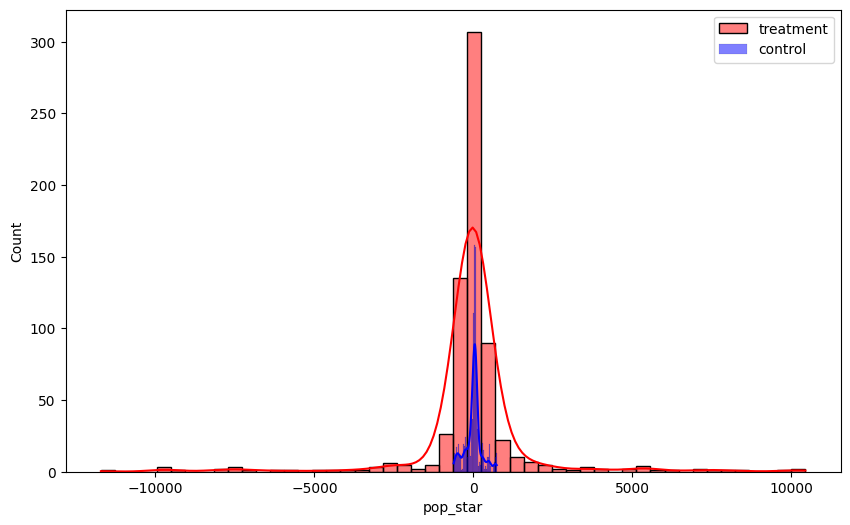

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pop_star'][df['treatment_group'] == 1], bins=50, kde=True, color='red', label='treatment')
sns.histplot(df['pop_star'][df['treatment_group'] == 0], bins=50, kde=True, color='blue', label='control');
plt.legend()
plt.show()

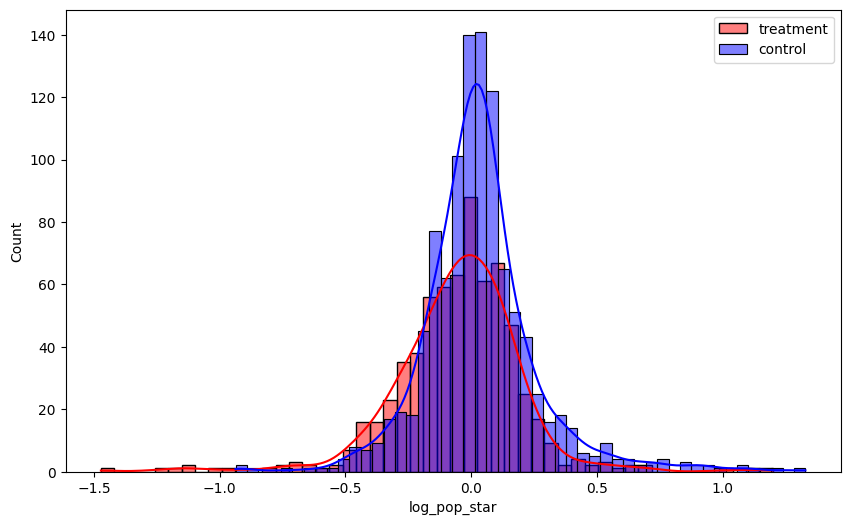

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_pop_star'][df['treatment_group'] == 1], bins=50, kde=True, color='red', label='treatment')
sns.histplot(df['log_pop_star'][df['treatment_group'] == 0], bins=50, kde=True, color='blue', label='control');
plt.legend()
plt.show()

<Axes: xlabel='year', ylabel='pop_star'>

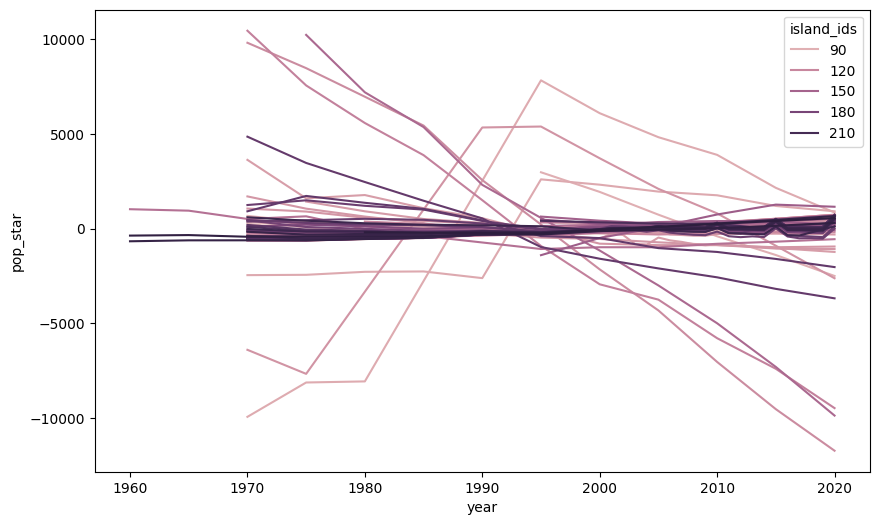

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='pop_star', hue='island_ids')

In [32]:
# 既に介入を受けている島
already_treated = df.groupby('island_ids').filter(lambda x: (x['after_treatment'] == 0).sum() == 0)['island_ids'].unique()
df['is_already_treated'] = np.where(df['island_ids'].isin(already_treated), 1, 0)

In [33]:
# 地域名，島名，県名を削除
df.drop(columns=['region_names', 'prefecture_names', 'island_names'], inplace=True)
df = df[['island_ids'] + [col for col in df.columns if col != 'island_ids']]

KeyError: "['region_names', 'prefecture_names', 'island_names'] not found in axis"

In [34]:
df

,island_ids,year,pseudo_year,region_codes,prefecture_codes,population,treatment_group,treatment_group_mainland,bridge_year,pseudo_bridge_year,...,connect_mainland_year,after_treatment_mainland,income,area_km2,distance_m,log_pop,pop_star,log_pop_star,time_since_treatment,is_already_treated
119,67,1970,1970,32202,32,NaN,1,1,1999,1999,...,1999,0,NaN,0.28,615.0,NaN,NaN,NaN,-29,0
120,67,1975,1975,32202,32,NaN,1,1,1999,1999,...,1999,0,NaN,0.28,615.0,NaN,NaN,NaN,-24,0
121,67,1980,1980,32202,32,NaN,1,1,1999,1999,...,1999,0,NaN,0.28,615.0,NaN,NaN,NaN,-19,0
122,67,1985,1985,32202,32,NaN,1,1,1999,1999,...,1999,0,4.243674e+07,0.28,615.0,NaN,NaN,NaN,-14,0
123,67,1990,1990,32202,32,NaN,1,1,1999,1999,...,1999,0,4.786833e+07,0.28,615.0,NaN,NaN,NaN,-9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,226,2000,2000,39424,39,398.0,1,1,1957,1957,...,1957,1,5.113370e+02,0.56,110.0,5.986452,-51.742797,-0.002503,43,1
3485,226,2005,2005,39424,39,365.0,1,1,1957,1957,...,1957,1,4.533435e+02,0.56,110.0,5.899897,88.193373,-0.004061,48,1
3486,226,2010,2010,39424,39,343.0,1,1,1957,1957,...,1957,1,3.903833e+02,0.56,110.0,5.837730,256.163002,0.065408,53,1
3487,226,2015,2015,39424,39,284.0,1,1,1957,1957,...,1957,1,4.064721e+02,0.56,110.0,5.648974,406.395500,0.035329,58,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 119 to 3488
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   island_ids                1863 non-null   int64  
 1   year                      1863 non-null   int64  
 2   pseudo_year               1863 non-null   int64  
 3   region_codes              1863 non-null   object 
 4   prefecture_codes          1863 non-null   int64  
 5   population                1723 non-null   float64
 6   treatment_group           1863 non-null   int64  
 7   treatment_group_mainland  1863 non-null   int64  
 8   bridge_year               1863 non-null   int64  
 9   pseudo_bridge_year        1863 non-null   int64  
 10  after_treatment           1863 non-null   int64  
 11  connect_mainland_year     1863 non-null   int64  
 12  after_treatment_mainland  1863 non-null   int64  
 13  income                    1401 non-null   float64
 14  area_km2   

In [36]:
df_filtered = df
export_filepath = '../../data/processed/df_filtered.xlsx'
df_filtered.to_excel(export_filepath, index=False)